## My Goal

* Import Data
* Take The Label from the data
* Take the image name from the data
* visualize random images
* turn to images to numpy array and enlarge the data
* build the model
* visualize the result of model

# Find the direction of dataset
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import random # for visualization
from sklearn.preprocessing import LabelEncoder
print('Libraries Imported')

Libraries Imported


In [2]:
path = '../input/mias-mammography/all-mias/'

an example of image path

../input/mias-mammography/all-mias/mdb001.pgm

## Read Data

In [3]:
print("reading dataframe")
info=pd.read_csv("../input/mias-mammography/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


In [4]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [5]:
info.dropna(subset = ["SEVERITY"], inplace=True)

info.reset_index(inplace = True)
info

,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,5,mdb005,F,CIRC,B,500.0,168.0,26.0
4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
...,...,...,...,...,...,...,...,...
118,281,mdb274,F,MISC,M,127.0,505.0,123.0
119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
120,319,mdb312,F,MISC,B,240.0,263.0,20.0
121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [9]:
info = info.drop([3], axis=0)
info.reset_index(inplace = True)
info = info.drop('level_0', axis =1)
info = info.drop('index', axis =1)
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb005,F,CIRC,B,477.0,133.0,30.0
3,mdb012,F,CIRC,B,471.0,458.0,40.0
4,mdb013,G,MISC,B,667.0,365.0,31.0
...,...,...,...,...,...,...,...
116,mdb274,F,MISC,M,127.0,505.0,123.0
117,mdb290,D,CIRC,B,337.0,353.0,45.0
118,mdb312,F,MISC,B,240.0,263.0,20.0
119,mdb314,F,MISC,B,518.0,191.0,39.0


In [10]:
# B = 0
# M = 1
lb = LabelEncoder()
info['SEVERITY'] = lb.fit_transform(info['SEVERITY'])
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,0,535.0,425.0,197.0
1,mdb002,G,CIRC,0,522.0,280.0,69.0
2,mdb005,F,CIRC,0,477.0,133.0,30.0
3,mdb012,F,CIRC,0,471.0,458.0,40.0
4,mdb013,G,MISC,0,667.0,365.0,31.0
...,...,...,...,...,...,...,...
116,mdb274,F,MISC,1,127.0,505.0,123.0
117,mdb290,D,CIRC,0,337.0,353.0,45.0
118,mdb312,F,MISC,0,240.0,263.0,20.0
119,mdb314,F,MISC,0,518.0,191.0,39.0


In [11]:

label = info.SEVERITY
label = np.array(label)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

## Turning our outputs B-M to 1-0

# Turning our outputs B-M to 1-0
label = []
for i in range(len(info)):
    if info.SEVERITY[i] == 'B':
        label.append(1)
    else:
        label.append(0)

In [12]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

In [13]:
img_name = np.array(img_name)

In [14]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (121,)


## view image random images

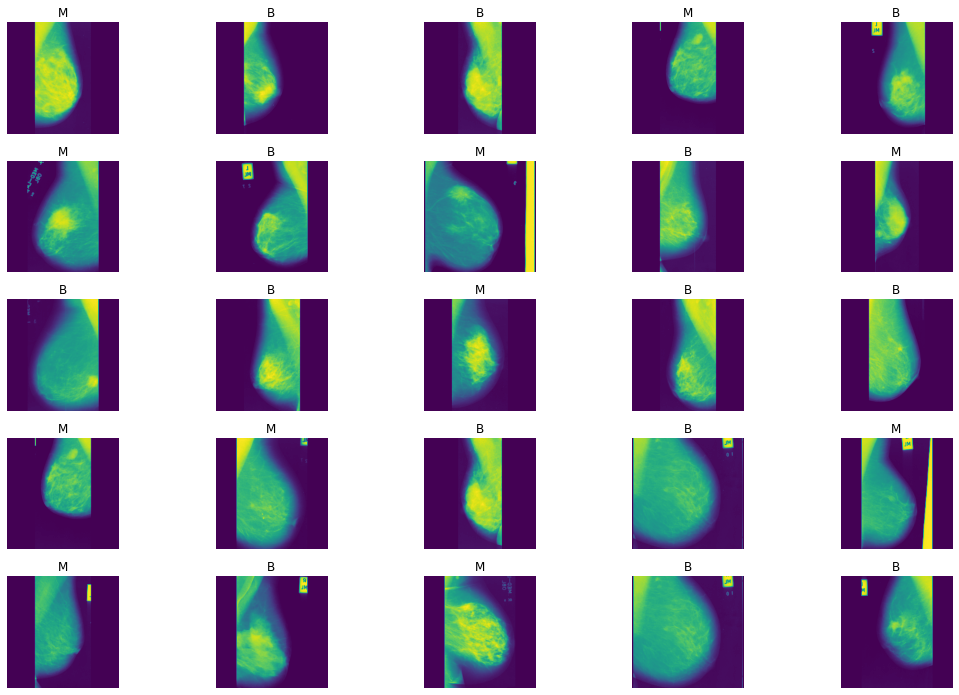

In [15]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('B')
        else:
            plt.title('M')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

view_25_random_image()

## read Images and labels. and augmentation of images

In [17]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(0, 360):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)


## split train and test set

In [19]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.25, random_state = 42)

In [22]:
len(x_train),len(x_test),len(y_train),len(y_test)

dtype('uint8')

In [23]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [24]:
x_train.shape

(32670, 224, 224)

In [25]:
x_test.shape

(10890, 224, 224)

In [28]:
x_train = np.reshape(x_train, (32670,224, 224, 1)) # 1 for gray scale
x_test = np.reshape(x_test, (10890,224, 224,1))

## Build a Model

In [29]:

def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [30]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

## Define Callbacks

In [31]:

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=100,
                 batch_size=64,
                 callbacks=[early_stop])



Epoch 1/100
409/409 [==============================] - 23s 48ms/step - loss: 7.2014 - accuracy: 0.5606 - val_loss: 0.5583 - val_accuracy: 0.6941
Epoch 2/100
409/409 [==============================] - 19s 46ms/step - loss: 0.4361 - accuracy: 0.7841 - val_loss: 0.2002 - val_accuracy: 0.9226
Epoch 3/100
409/409 [==============================] - 19s 46ms/step - loss: 0.1206 - accuracy: 0.9568 - val_loss: 0.0798 - val_accuracy: 0.9731
Epoch 4/100
409/409 [==============================] - 19s 46ms/step - loss: 0.0513 - accuracy: 0.9850 - val_loss: 0.0883 - val_accuracy: 0.9732
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


the model looks overfitting. those may be the reason
* we don't have enough data
* We enlarge multiple images with the same image

In [33]:
y_test = np.array(y_test)
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model.predict(x_test))

341/341 [==============================] - 3s 9ms/step - loss: 0.0782 - accuracy: 0.9770
Test_loss_value = 0.07816994190216064
test_accuracy = 0.9770431518554688
[[0.04567525]
 [0.00477535]
 [0.00154399]
 ...
 [0.9999764 ]
 [0.05912547]
 [0.269873  ]]


## Let's Visualize our result

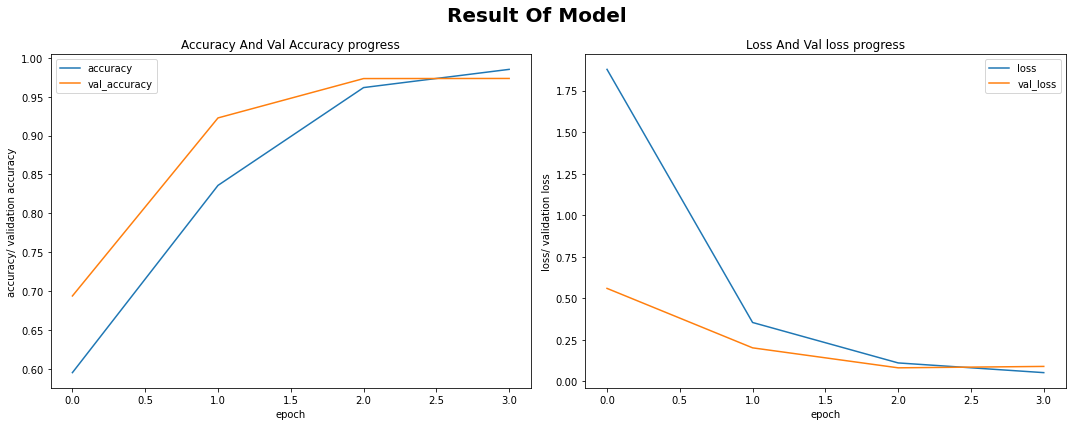

In [34]:

def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])

In [35]:
y_pred=model.predict(x_test)

In [36]:
y_pred.shape

(10890, 1)

In [37]:
y_pred

array([[0.04567525],
       [0.00477535],
       [0.00154399],
       ...,
       [0.9999764 ],
       [0.05912547],
       [0.269873  ]], dtype=float32)